In [125]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
train_dir='/kaggle/input/damage-or-not-dataset/data1a/training'

In [127]:
image_size = (224,224)
batch_size = 32

In [128]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 1564 images belonging to 2 classes.


In [129]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 276 images belonging to 2 classes.


In [130]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
base_model = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
predictions = Dense(2, activation='softmax')(x)

In [131]:
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
epochs = 20
h=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/20


W0000 00:00:1710084924.077210     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/48 ━━━━━━━━━━━━━━━━━━━━ 12s 530ms/step - accuracy: 0.6534 - loss: 1.3169

W0000 00:00:1710084939.458671     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.6933 - loss: 1.2736

W0000 00:00:1710084953.726684     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


48/48 ━━━━━━━━━━━━━━━━━━━━ 43s 677ms/step - accuracy: 0.6944 - loss: 1.2721 - val_accuracy: 0.8945 - val_loss: 0.9531 - learning_rate: 1.0000e-05
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8750 - loss: 0.9854 - val_accuracy: 0.9500 - val_loss: 0.8904 - learning_rate: 1.0000e-05
Epoch 3/20


W0000 00:00:1710084957.393642     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


48/48 ━━━━━━━━━━━━━━━━━━━━ 30s 567ms/step - accuracy: 0.8569 - loss: 0.9972 - val_accuracy: 0.9297 - val_loss: 0.8555 - learning_rate: 1.0000e-05
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8750 - loss: 0.8948 - val_accuracy: 0.9500 - val_loss: 0.8262 - learning_rate: 1.0000e-05
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 30s 575ms/step - accuracy: 0.8896 - loss: 0.9250 - val_accuracy: 0.9414 - val_loss: 0.8208 - learning_rate: 1.0000e-05
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.8450 - val_accuracy: 0.9500 - val_loss: 0.8353 - learning_rate: 1.0000e-05
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 31s 578ms/step - accuracy: 0.9148 - loss: 0.8836 - val_accuracy: 0.9375 - val_loss: 0.8046 - learning_rate: 1.0000e-05
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 1.0704 - val_accuracy: 0.9500 - val_loss: 0.8185 - learning_rate: 1.0000e-05
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 30s 573ms/step - accuracy: 0.9079 - loss

In [132]:
from tensorflow.keras.preprocessing.image import load_img
image1 = load_img('/kaggle/input/damage-or-not-dataset/data1a/training/00-damage/0004.JPEG', target_size=(224,224,3))

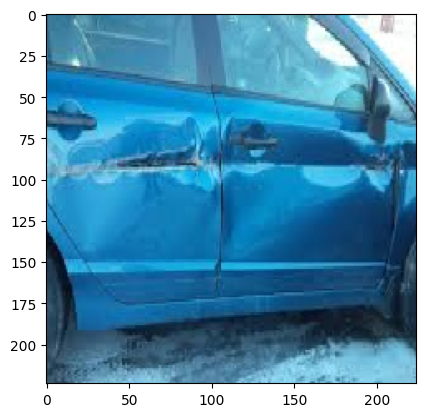

In [133]:
import matplotlib.pyplot as plt
plt.imshow(image1)


In [135]:
from tensorflow.keras.preprocessing.image import img_to_array
image1 = img_to_array(image1)
#image=image/255

In [136]:
from tensorflow.keras.applications.vgg16 import preprocess_input
image = preprocess_input(image1)

In [137]:
import numpy as np
image1=np.expand_dims(image1,axis=0)
pred = model.predict(image1)
pred_labels=np.argmax(pred,axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


In [138]:
pred

array([[1.0000000e+00, 5.2001698e-11]], dtype=float32)

In [139]:
d={0:'Damaged',1:'Whole'}
for key in d.keys():
    if pred_labels[0]==key:
       print("validating whether damge or not...........Result:",d[key])
       print("damage detection complete")

validating whether damge or not...........Result: Damaged
damage detection complete


In [140]:
print(pred)

[[1.0000000e+00 5.2001698e-11]]


In [141]:
pred_labels

array([0])

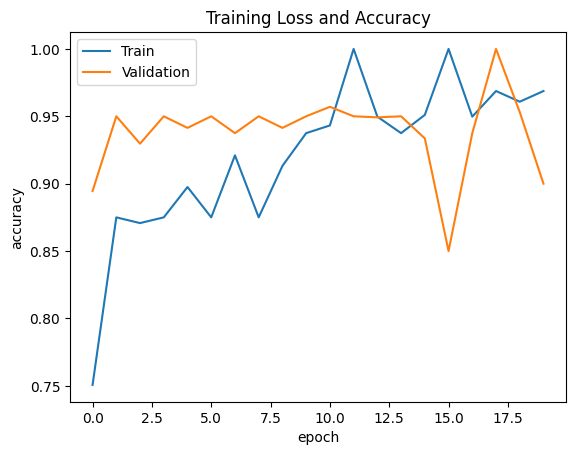

In [142]:
plt.plot(h.history['accuracy']) #get the accuracy for the training set from the model's history attribute
plt.plot(h.history['val_accuracy'])   #get the loss for the training set from the model's history attribute
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])

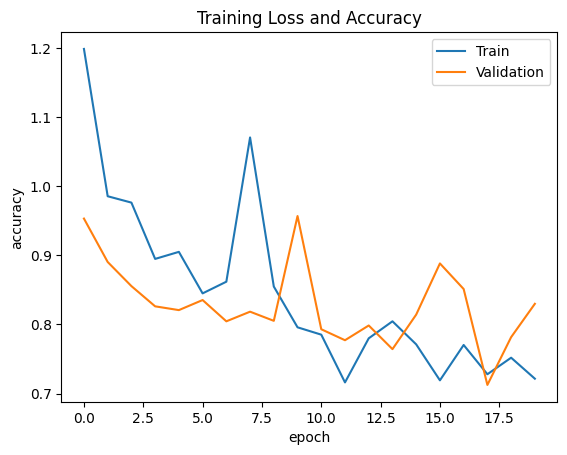

In [143]:
plt.plot(h.history['loss']) #get the accuracy for the training set from the model's history attribute
plt.plot(h.history['val_loss'])   #get the loss for the training set from the model's history attribute
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])

In [ ]:
model.save('/content/drive/MyDrive/BE project /data1a/new_damage_or_not.h5')